# Distribution plots

* The problem with histograms
* Alternatives to histograms

In [22]:
import numpy as np
import pandas as pd
import warnings
from empiricaldist import Pmf, Cdf

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
warnings.filterwarnings('ignore')

In [2]:
def annotated_pmf_plot(data, x):
    def get_percentile_probability(data, x, pmf, percentile='50%'):
        percentile_score = data[x].describe()[percentile]
        return percentile_score, pmf[percentile_score]
    
    def label_scores(ax, score, probability, label):
        # Annotate the percentile score
        ax.annotate(text=f'{label}: {int(score)}',
                    xy=(score, probability),
                    xycoords='data',
                    fontsize=10,
                    xytext=(-200, 30),
                    textcoords='offset points', 
                    arrowprops=dict(facecolor='red', width=2))
    
    pmf_dist_norm = Pmf.from_seq(data[x], normalize=True)
    score_25, probability_25 = get_percentile_probability(data, x, pmf_dist_norm, percentile='25%')
    score_50, probability_50 = get_percentile_probability(data, x, pmf_dist_norm, percentile='50%')

    # Recreate the plot with annotations
    fig, ax = plt.subplots(figsize=(8, 4))

    # Plot the PMF
    pmf_dist_norm.plot()

    # Labelling
    ax.set(xlabel='Math Score',
        ylabel='Frequency',
        title='The probabilty of each score occuring among students')

    label_scores(ax, score_50, probability_50, label='50th percentile (median)')
    label_scores(ax, score_25, probability_25, label='25th percentile')

In [3]:
# Load data
FILE_PATH = '/workspaces/distribution_plots/data/'

marks = pd.read_csv(FILE_PATH + 'StudentsPerformance.csv')
marks.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Histogram plot of student scores

* Three histogram plots of the same data:
  * 10 bins. Most scores between 60 and 80
  * 20 bins. Again, most scores are between 60 and 80
  * 40 bins. Distribution is more spiky with small peaks around 40, 62, 68, and 80
* Histograms are sensitive to the choice of the number of bins
* Using a large number of bins can introduce random noise

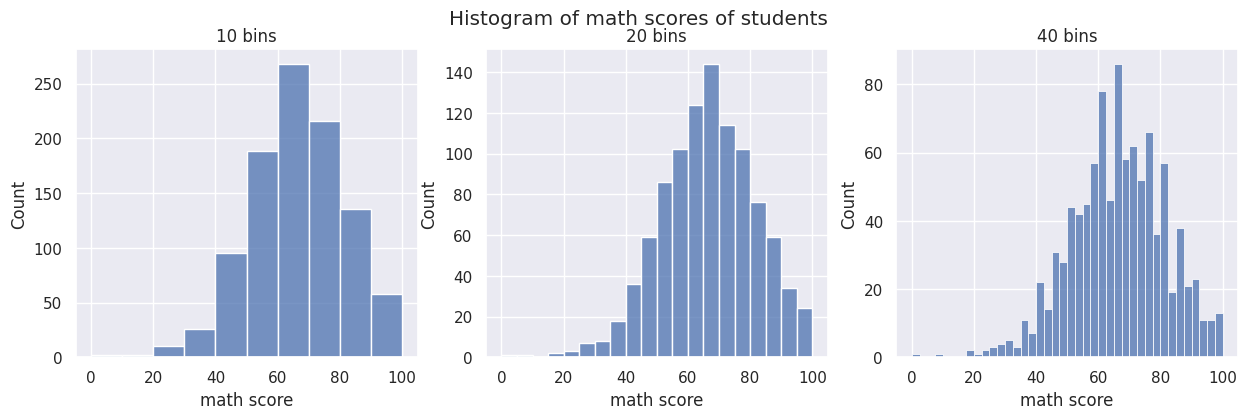

In [4]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(15, 4))
figure.suptitle('Histogram of math scores of students')
axes[0].set_title('10 bins')
axes[1].set_title('20 bins')
axes[2].set_title('40 bins')

sns.histplot(ax=axes[0], data=marks, x='math score', bins=10)
sns.histplot(ax=axes[1], data=marks, x='math score', bins=20)
sns.histplot(ax=axes[2], data=marks, x='math score', bins=40)
plt.show()

### Probability Mass Function (PMF)

* Discrete distribution of values
* PMF returns the frequency of each unique value

In [5]:
# Compute PMF
pmf_dist = Pmf.from_seq(marks['math score'], normalize=False)
pmf_dist

,probs
math score,
0,1
8,1
18,1
19,1
22,1
...,...
96,3
97,6
98,3


In [6]:
# Compute PMF. Values are normalized such that they sum to 1
pmf_dist_norm = Pmf.from_seq(marks['math score'], normalize=True)
pmf_dist_norm

,probs
math score,
0,0.001
8,0.001
18,0.001
19,0.001
22,0.001
...,...
96,0.003
97,0.006
98,0.003


In [7]:
# Compute PMF. Normalized frequency of a specific score (68) 
pmf_dist_norm[68]

0.026

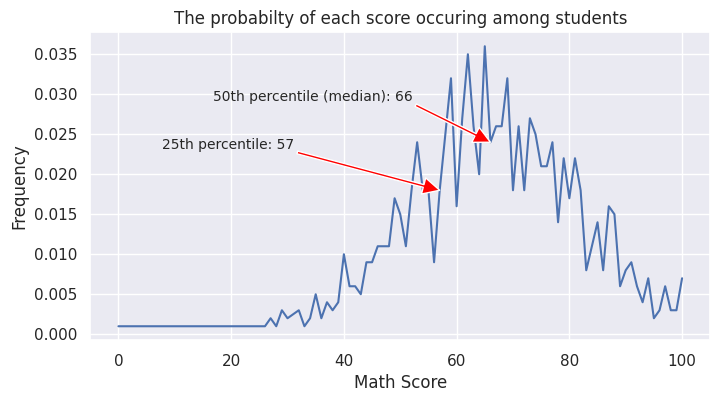

In [8]:
annotated_pmf_plot(data=marks, x='math score')

#### Compare histogram and PMF of student math scores

* Histogram is smoother but hides some of the characteristics (spikes) of the data
* PMF reveals peaks at scores of 40 and 55

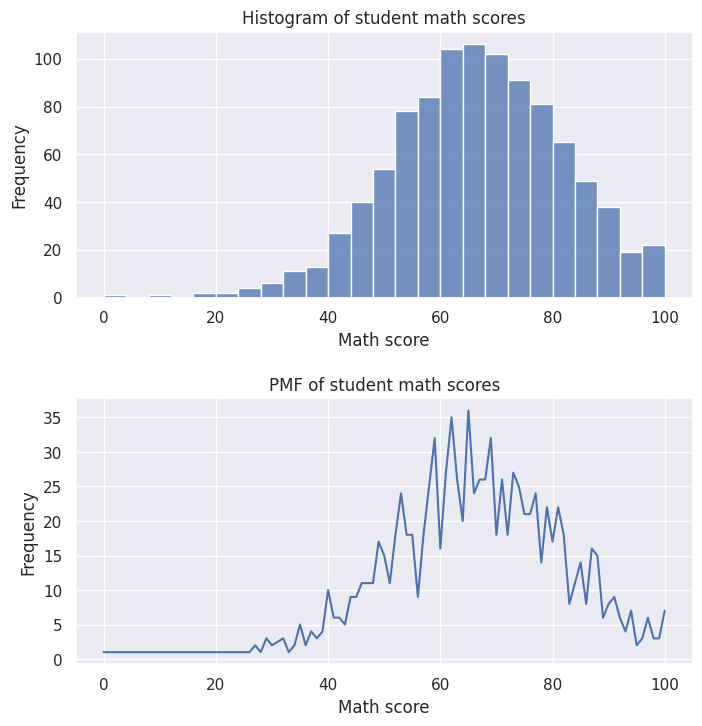

In [13]:
# Create axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Set a padding
fig.tight_layout(pad=4)

# Histogram of math scores
sns.histplot(marks['math score'], bins=25, ax=ax1)  
ax1.set(xlabel='Math score',
        ylabel='Frequency',
        title='Histogram of student math scores')

# PMF of math scores
ax2.plot(pmf_dist)
ax2.set(xlabel='Math score',
        ylabel='Frequency',
        title='PMF of student math scores');

### Cumulative Distribution Frequency (CDF)

* PMF only works with discrete values
* PMF fail where a distribution has too many random integers
* CDF works with discrete, continuous, mixed values
* CDF gives the probability that the random variable X is less than or equal to x and is usually denoted F(x)

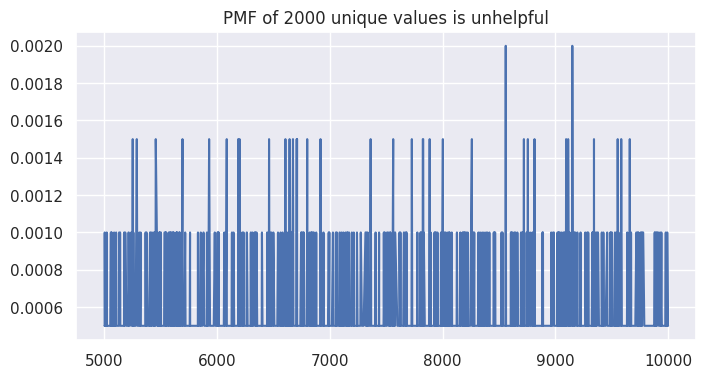

In [20]:
# Create 2000 random integers
numbers = np.random.randint(5000, 10000, size=2000)

# Plot the numbers
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(Pmf.from_seq(numbers))
plt.title("PMF of 2000 unique values is unhelpful")
plt.show();

In [23]:
# Load diamonds dataset
diamonds = sns.load_dataset('diamonds')

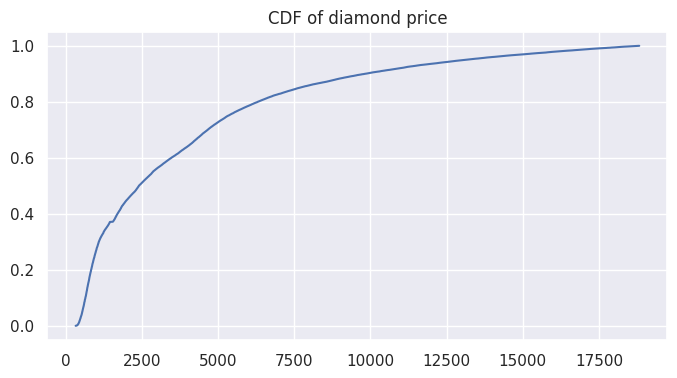

In [26]:
# Create the CDF
cdf_prices = Cdf.from_seq(diamonds['price'])

# Plot the CDF
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cdf_prices)
plt.title("CDF of diamond price")
plt.show();

In [27]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [41]:
def comparison_cdf_plot(data, target, feature):
    def calculate_cdf(category):
        mask = data[feature] == category
        return Cdf.from_seq(data[mask][target])

    ideal_cdf = calculate_cdf(category='Ideal')
    premium_cdf = calculate_cdf(category='Premium')
    very_good_cdf = calculate_cdf(category='Very Good')

    # Plot each cut category (ideal, premium, very good)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(ideal_cdf)
    ax.plot(premium_cdf)
    ax.plot(very_good_cdf)

    ax.set(title='Comparing the Price of Differently-cut Diamonds',
        xlabel='Price ($)',
        ylabel='Cumulative Frequency')
    plt.legend(['Ideal', 'Premium', 'Very Good'])
    plt.show();

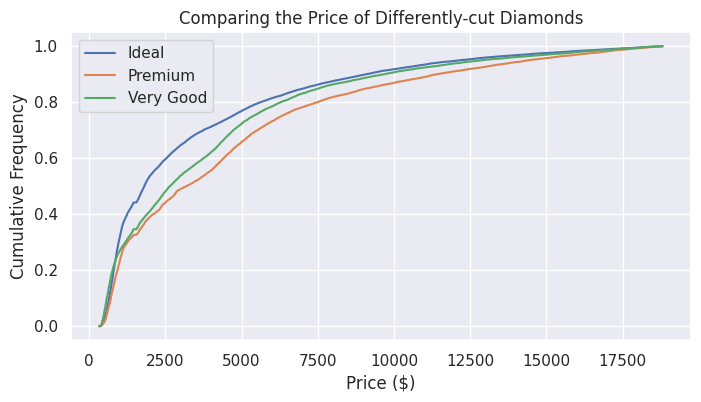

In [42]:
comparison_cdf_plot(data=diamonds, target='price', feature='cut')